<a href="https://colab.research.google.com/github/tomtmot/20220702_python/blob/main/20220730.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用 Teachable Machine 幫我們訓練好的模型

In [ ]:
!unzip model.zip

Archive:  model.zip
 extracting: keras_model.h5          
 extracting: labels.txt              


In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('victor.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[0.0271141  0.97288597]]


# 使用 Gradio 打包上面的模型來使用

In [ ]:
!pip install gradio

In [ ]:
import random

In [ ]:
def classify(image):
  # Load the model
  model = load_model('keras_model.h5')
  
  image.save(f"{random.randint(0, 99999):05}.jpg")

  # Create the array of the right shape to feed into the keras model
  # The 'length' or number of images you can put into the array is
  # determined by the first position in the shape tuple, in this case 1.
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  #resize the image to a 224x224 with the same strategy as in TM2:
  #resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)

  #turn the image into a numpy array
  image_array = np.asarray(image)
  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  # Load the image into the array
  data[0] = normalized_image_array

  # run the inference
  prediction = model.predict(data)
  labels = ["戴著口罩的Victor", "沒有戴口罩的Victor"]
  return labels[np.argmax(prediction)]

In [ ]:
import gradio as gr

In [ ]:
gr.Interface(classify, inputs=gr.Image(type="pil"), outputs="text").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://11236.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f52067e3690>,
 'http://127.0.0.1:7862/',
 'https://11236.gradio.app')

## 練習

請印出 0-15 的二進位數值。

In [ ]:
for i in range(16):
  print(f"{i:2} 的二進位是：{i:04b}")

 0 的二進位是：0000
 1 的二進位是：0001
 2 的二進位是：0010
 3 的二進位是：0011
 4 的二進位是：0100
 5 的二進位是：0101
 6 的二進位是：0110
 7 的二進位是：0111
 8 的二進位是：1000
 9 的二進位是：1001
10 的二進位是：1010
11 的二進位是：1011
12 的二進位是：1100
13 的二進位是：1101
14 的二進位是：1110
15 的二進位是：1111


# Scikit-Learn 簡介

## 載入資料集

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = iris.data

In [ ]:
y = iris.target

In [ ]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
y[0]

0

In [ ]:
len(X)

150

## 拆分訓練集跟測試集

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 使用 SVM 來做分類

In [ ]:
# 1. 載入模型
from sklearn.svm import SVC

In [ ]:
# 2. 建立模型
clf = SVC()

In [ ]:
# 3. 訓練模型
clf.fit(X_train, y_train)

SVC()

In [ ]:
# 計算模型準確度 (Accuracy)
clf.score(X_test, y_test)

1.0

In [ ]:
# 4. 使用模型
clf.predict(X_test)

array([2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1,
       1, 2, 0, 0, 2, 2, 0, 1])

## 使用 Random Forest 來做分類

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# 1. 載入模型
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 2. 建立模型
clf = RandomForestClassifier()

In [ ]:
# 3. 訓練模型
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# 計算模型準確度 (Accuracy)
clf.score(X_test, y_test)

0.9666666666666667

## 使用 Mediapipe 畫出手的關節點

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 1.3 MB/s 


Handedness: [classification {
  index: 0
  score: 0.9739812016487122
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.440412312746048
  y: 0.8440699577331543
  z: 6.131384111540683e-07
}
landmark {
  x: 0.5253701210021973
  y: 0.7963429689407349
  z: -0.03043748438358307
}
landmark {
  x: 0.5851256251335144
  y: 0.6945905089378357
  z: -0.038052767515182495
}
landmark {
  x: 0.6376991271972656
  y: 0.6405236721038818
  z: -0.04533441364765167
}
landmark {
  x: 0.688489556312561
  y: 0.6372140645980835
  z: -0.05176584795117378
}
landmark {
  x: 0.5196060538291931
  y: 0.49121785163879395
  z: 0.00436415895819664
}
landmark {
  x: 0.5373178720474243
  y: 0.3597220182418823
  z: 0.0031331137288361788
}
landmark {
  x: 0.5416560173034668
  y: 0.27946823835372925
  z: -0.0042462763376533985
}
landmark {
  x: 0.5423159599304199
  y: 0.2140929102897644
  z: -0.01270301453769207
}
landmark {
  x: 0.4701686501502991
  y: 0.4718833565711975
  z: 0.005412953905761242
}
landmark {
  x: 0.468

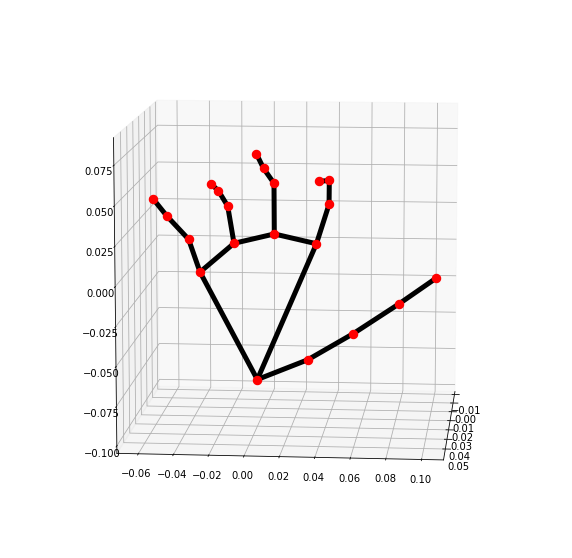

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = ['my_hand.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        'my_hand' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

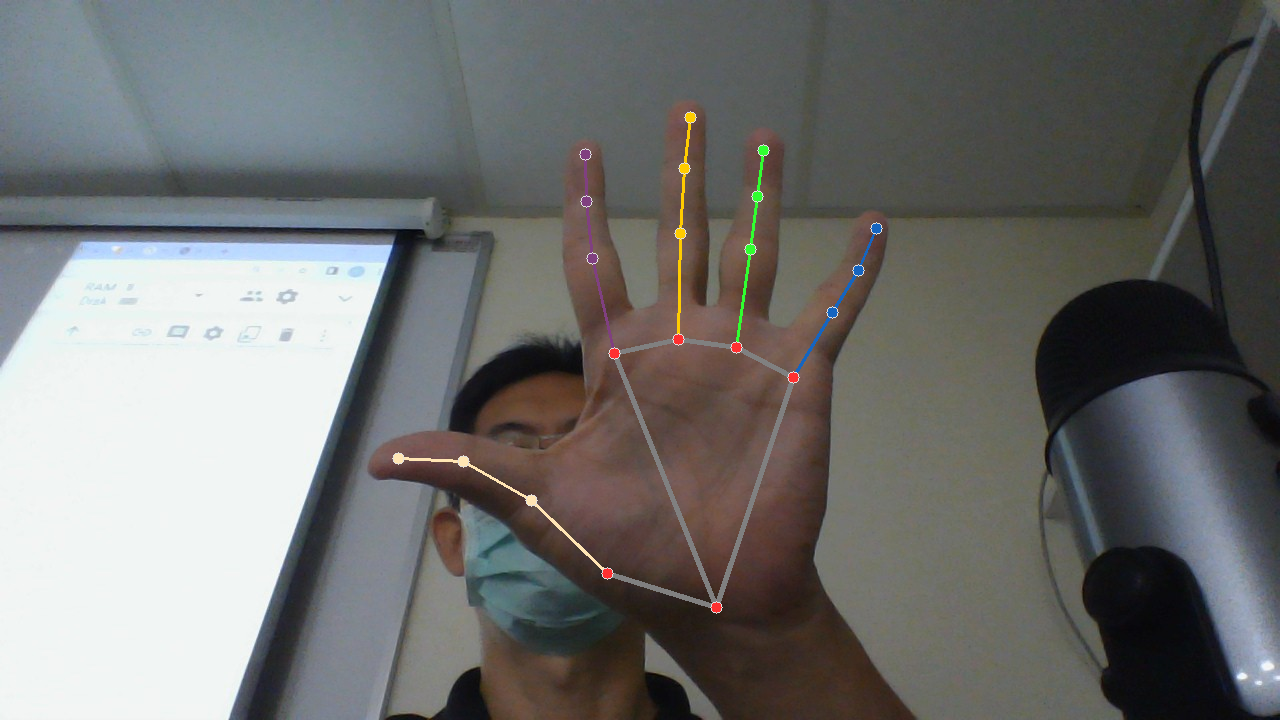

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

file = 'my_hand.jpg'
with mp_hands.Hands(static_image_mode=True,max_num_hands=2,min_detection_confidence=0.5) as hands:
  image = cv2.flip(cv2.imread(file), 1)
  results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  image_height, image_width, _ = image.shape
  annotated_image = image.copy()
  for hand_landmarks in results.multi_hand_landmarks:
    mp_drawing.draw_landmarks(
        annotated_image,
        hand_landmarks,
        mp_hands.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())
  cv2.imwrite('my_hand.png', cv2.flip(annotated_image, 1))

im = Image.open('my_hand.png')
im

# HOMEWORK

寫一個 gradio 的 APP，輸入手的圖形後，輸出畫上關節點的手的圖形。

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://15567.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f520682ba10>,
 'http://127.0.0.1:7864/',
 'https://15567.gradio.app')

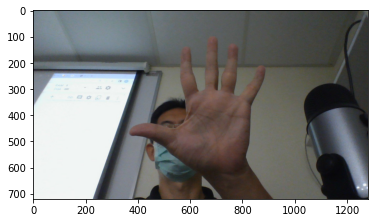

In [ ]:
import matplotlib.pyplot as plt
def show(image):
  plt.imsave("test.jpg",image)
  return "Good"

gr.Interface(show, inputs="image", outputs="text").launch(share=True)

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

def draw_landmarks(image):
  with mp_hands.Hands(static_image_mode=True,max_num_hands=2,min_detection_confidence=0.5) as hands:
    # image = cv2.flip(image, 1)
    results = hands.process(image)

    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    # image = cv2.flip(annotated_image, 1)
    return annotated_image

In [ ]:
gr.Interface(draw_landmarks, inputs="image", outputs="image").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://11586.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f5206630a10>,
 'http://127.0.0.1:7866/',
 'https://11586.gradio.app')